In [1]:
import sys
import os
import numpy as np
os.chdir("..")
sys.path.append(os.getcwd() + '/src')

from elisa.conf import config
config.LOG_CONFIG = os.getcwd() + 'jupyter_tutorials/logging.json'

/home/miro/ELISa/src/elisa/conf/config.py:161: UserWarning: path /home/miro/ELISa/atmosphere/ck93
to kurucz 1993 atmosphere atlas doesn't exists
Specifiy it in elisa_conf.ini file
  "Specifiy it in elisa_conf.ini file".format(K93_ATM_TABLES))


# Demo No. 2 - Orbital motion

This demo will demonstrate capability of the package to produce orbital positions of binary system in reference frame alligned with orbital plane and centered on the primary component.
Lets start by defining our binary system (see Demo No. 1): 

In [2]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from astropy import units as u


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=0.45 * u.solMass,
    surface_potential=5.39,
    synchronicity=1.0,
    t_eff=8000 * u.K,
    gravity_darkening=1.0,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.00000 * u.d,
    phase_shift=0.0,
)

INFO:BinarySystem:initialising object BinarySystem
INFO:BinarySystem:Setting discretization factor of secondary component to 26.69 as a according to discretization factor of the primary component 


Lets now define phases at which we would like to obtain orbital positions:

In [3]:
phases = np.linspace(0, 1.0, num=5)

Finally, components distance, azimuth, mean anomaly and corresponding photometric phase of the binary can be calculated using following command: 

In [4]:
positions, positions_array = bs.calculate_orbital_motion(phases)
positions

[Position(idx=0.0, distance=0.8207866831934495, azimuth=1.5707963267948966, true_anomaly=0.55850536063818534, phase=0.0),
 Position(idx=1.0, distance=1.1032508351682753, azimuth=3.2896477635311969, true_anomaly=2.2773567973744857, phase=0.25),
 Position(idx=2.0, distance=1.1904578657982738, azimuth=4.4077925557299933, true_anomaly=3.3955015895732821, phase=0.5),
 Position(idx=3.0, distance=0.96533364799712362, azimuth=5.6970505011458785, true_anomaly=4.6847595349891673, phase=0.75),
 Position(idx=4.0, distance=0.8207866831934495, azimuth=1.5707963267948961, true_anomaly=0.55850536063818479, phase=1.0)]

Each parameter of the given orbital Position can be accesed separatelly. For example:

In [5]:
positions[0].azimuth

1.5707963267948966

is an orbital azimuth of the secondary component for the first `Position` in our `positions` list. Orbital azimuth is basically angular distance of the secondary component from ascending node incident with negative y-axis, since line of sight vector is parallel to x-axis.

Orbital position parameters are also returned in the form of numpy array, where index of the orbital position is added into the first column:

In [6]:
positions_array

array([[ 0.        ,  0.82078668,  1.57079633,  0.55850536,  0.        ],
       [ 1.        ,  1.10325084,  3.28964776,  2.2773568 ,  0.25      ],
       [ 2.        ,  1.19045787,  4.40779256,  3.39550159,  0.5       ],
       [ 3.        ,  0.96533365,  5.6970505 ,  4.68475953,  0.75      ],
       [ 4.        ,  0.82078668,  1.57079633,  0.55850536,  1.        ]])

## Visualizing orbit

Orbit of the binary system can be also visualized using following command:

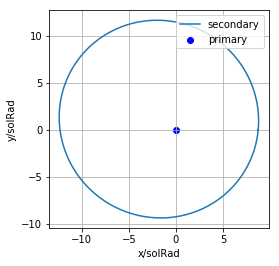

In [32]:
bs.plot.orbit()